<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 2 (Logistic Regression dan SVM)</font></h1>

------------------------------------------------

# Kelompok 3 - PYTN KS 014

Nurul Fajriyah Al Maulidiyah  : PYTN-KS14-001 <br>
Fransisca Mulya Sari          : PYTN-KS14-011 <br>

MSIB Kampus Merdeka Batch 4 (Mei, 2023)

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Cuaca merupakan faktor alam yang sangat mempengaruhi kehidupan manusia. Dalam kehidupan sehari-hari, banyak aktivitas dan tindakan manusia yang bergantung pada faktor dan keadaan cuaca. Seseorang yang akan berpergian membutuhkan informasi cuaca untuk menentukan tujuan perjalanan dan keputusan untuk berangkat pada tujuan tersebut. Mengantisipasi cuaca merupakan kebutuhan manusia untuk dapat melakukan aktivitas dengan baik. Faktor-faktor yang mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, kecepatan angin, dan lainnya. Salah satu fenomena terpenting dalam kehidupan yang dipengaruhi oleh cuaca adalah hujan. 

Hujan merupakan fenomena yang tidak dapat dihindari dimana cuaca merupakan salah satu faktor yang mempengaruhi terjadinya hujan. Oleh karena itu, prakiraan terkait cuaca menjadi sangat penting. Apakah besok akan hujan atau tidak dapat bisa menilai dari klasifikasinya. Metode statistik dan pembelajaran machine learning untuk memprediksi hujan akan dibandingkan dalam project ini. Pada project ini, kami ingin melakukan prediksi pada kejadian hujan di Australia dengan menggunakan metode logistic regression dan SVM. 

Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. **RainTomorrow** adalah variabel target untuk diprediksi. Artinya apakah keesokan harinya hujan, Ya atau Tidak? Kolom ini Ya jika hujan pada hari itu 1 mm atau lebih.


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Rain in Australia">Rain in Australia</a>. 


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi hujan di wilayah Australia.
- Untuk membuat beberapa model yang dianggap paling sesuai dengan metode logistic regression dan SVM sehingga diperoleh akurasi yang tinggi.
- Untuk memprediksi hujan di wilayah Australia berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode logistic regression dan SVM.

# B. Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV

# Import Library untuk balancing
from sklearn.utils import resample

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# C. Data Loading
Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

## C.1. Memanggil dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max.columns',25)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Keterangan dataset:**

Dataset ini berisi 23 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `Date` = Tanggal terjadinya hujan
2. `Location` = Wilayah di Australia yang mengalami hujan
3. `MinTemp` = Suhu Minimal (Celcius)
4. `MaxTemp` = Suhu Maksimal (Celcius)
5. `Rainfall` = Jumlah Curah Hujan Tercatat dalam hari (Mm)
6. `Evaporation` = Evaporasi dalam sehari 
7. `Sunshine` = Lama Matahari Cerah di Siang Hari (Jam)
8. `WindGustDir` = Arah Hembusan Angin terkuat dalam sehari
9. `WindGustSpeed` = Kecepatan Angin terkuat dalam sehari (km/jam)
10. `WindDir9am` = Arah Angin Jam 9 Pagi
11. `WindDir3pm` = Arah Angin Jam 3 Sore
12. `WindSpeed9am` = Kecepatan Angin sebelum jam 9 Pagi (km/jam)
13. `WindSpeed3pm` = Kecepatan Angin sebelum jam 3 sore (km/jam)
14. `Humidity9am` = Kelembaban jam 9 Pagi
15. `Humidity3pm` = Kelembaban jam 3 Sore
16. `Pressure9am` = Tekanan atmosfer (hpa) berkurang ke rata-rata permukaan laut pada jam 9 pagi
17. `Pressure3pm` = Tekanan atmosfer (hpa) berkurang ke rata-rata permukaan laut pada jam 3 sore
18. `Cloud9am` = Keadaan Awan Jam 9 pagi (0 – 8); 0 = Paling Cerah, ...., 8 = Mendung Sekali 
19. `Cloud3pm` = Keadaan Awan Jam 3 Sore (0 – 8); 0 = Paling Cerah, ...., 8 = Mendung Sekali 
20. `Temp9am` = Temperatur Jam 9 Pagi (Celcius)
21. `Temp3pm` = Temperatur Jam 3 Sore (Celcius)
22. `RainToday` = Keadaan Cuaca Hari ini; 0 = Tidak Hujan atau 1 = Terjadi Hujan
23. `RainTomorrow` = Kejadian hujan pada esok hari; 0 = Tidak Hujan atau 1 = Terjadi Hujan

## C.2. Melihat ukuran data

In [3]:
df.shape

(145460, 23)

## C.3. Deskriptif Statistik

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## C.4. Mengecek info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# D. Data Preprocessing
Data pre-processing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan data mining.

## D.1. Pengecekan missing value

In [61]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## D.2. Pengecekan data duplikat
Mengecek data duplikat pada keseluruhan data df.

In [7]:
df.duplicated().sum()

0

## D.3. Mengubah tipe data datetime
Mengubah tipe data datetime dari float menjadi datetime.

In [8]:
df['Date']=pd.to_datetime(df['Date'])

Berdasarkan D.2. sampai dengan D.4. diperoleh informasi bahwa: <br>
1. Dataset secara keseluruhan tidak memiliki data yang duplikat
2. Mengubah tipe data datetime, dari object menjadi datetime64[ns]
3. Menghapus kolom duplikat (visibility1) 

In [9]:
for column in df.columns:
    total_null = df[column].isnull().sum()
    total_data = len(df[column])
    percent_missing = (total_null / total_data) * 100
    
    print(f"Kolom : {column}")
    print(f"Total nilai null: {total_null}")
    print(f"Total data: {total_null}")
    print(f"Persentase missing value: {percent_missing:.2f}%")
    print('')

Kolom : Date
Total nilai null: 0
Total data: 0
Persentase missing value: 0.00%

Kolom : Location
Total nilai null: 0
Total data: 0
Persentase missing value: 0.00%

Kolom : MinTemp
Total nilai null: 1485
Total data: 1485
Persentase missing value: 1.02%

Kolom : MaxTemp
Total nilai null: 1261
Total data: 1261
Persentase missing value: 0.87%

Kolom : Rainfall
Total nilai null: 3261
Total data: 3261
Persentase missing value: 2.24%

Kolom : Evaporation
Total nilai null: 62790
Total data: 62790
Persentase missing value: 43.17%

Kolom : Sunshine
Total nilai null: 69835
Total data: 69835
Persentase missing value: 48.01%

Kolom : WindGustDir
Total nilai null: 10326
Total data: 10326
Persentase missing value: 7.10%

Kolom : WindGustSpeed
Total nilai null: 10263
Total data: 10263
Persentase missing value: 7.06%

Kolom : WindDir9am
Total nilai null: 10566
Total data: 10566
Persentase missing value: 7.26%

Kolom : WindDir3pm
Total nilai null: 4228
Total data: 4228
Persentase missing value: 2.91%

K

**Keterangan** <br>
Dari 23 kolom, ada 4 kolom yang memiliki persentase missing value paling tinggi. Diantaranya adalah Evaporation, Sunshine, Cloud9am, dan Cloud3pm. Oleh karena itu, kolom-kolom tersebut akan dihapuskan pada data cleaning.

## D.4. Data Cleaning 
Data Cleaning adalah proses menyiapkan data dengan cara menghapus atau memodifikasi data yang salah, tidak relevan, tidak akurat, dan duplikat. Pada data cleaning ini akan dilakukan pengisian data pada missing value (fillna) menggunakan median untuk tipe data float dan fillna menggunakan modus untuk tipe data object.

In [10]:
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [11]:
#Mengecek missing value
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Ternyata ada banyak missing value pada kolom-kolom yang ada pada dataset tersebut. Pada data cleaning akan menggunakan metode fillna dengan median untuk tipe data integer atau float, dan fillna dengan modus untuk tipe data object.

In [12]:
#Mengisi missing value tipe data float dengan median
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].median())
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].median())
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].median())
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(df["WindGustSpeed"].median())
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(df["WindSpeed9am"].median())
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].median())
df["Humidity9am"]=df["Humidity9am"].fillna(df["Humidity9am"].median())
df["Humidity3pm"]=df["Humidity3pm"].fillna(df["Humidity3pm"].median())
df["Pressure9am"]=df["Pressure9am"].fillna(df["Pressure9am"].median())
df["Pressure3pm"]=df["Pressure3pm"].fillna(df["Pressure3pm"].median())
df["Temp9am"]=df["Temp9am"].fillna(df["Temp9am"].median())
df["Temp3pm"]=df["Temp3pm"].fillna(df["Temp3pm"].median())

In [13]:
#Mengisi missing value tipe data object dengan modus
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [14]:
#Use notna() function to find the non-missing values, when there are missing values in the dataframe.
df = df[df['RainTomorrow'].notna()] 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [15]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Setelah proses fillna dengan median dan modus, dapat dilihat bahwa missing value sudah tidak ada.

# E. Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

## E.2. Visualisasi Data
### 1. Lokasi mana yang memiliki jumlah curah hujan paling tinggi?

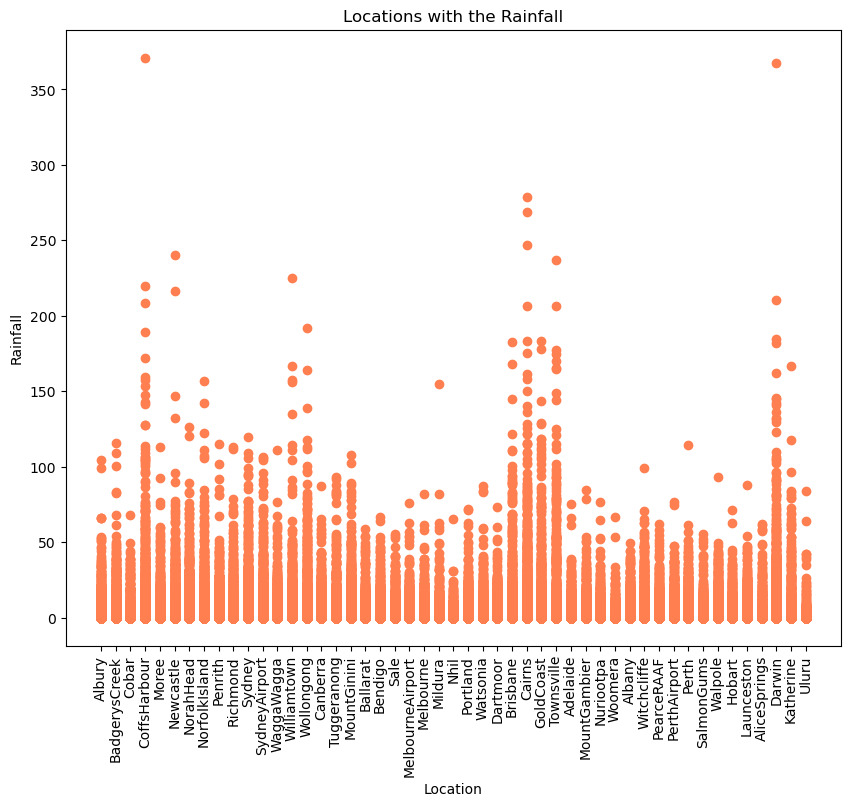

In [173]:
plt.figure(figsize=(10,8))
plt.scatter(df['Location'],df['Rainfall'], color='coral')
plt.xticks(rotation=90)
plt.title("Locations with the Rainfall")
plt.xlabel("Location")
plt.ylabel("Rainfall")
plt.show()

In [172]:
df_locr = df.loc[:,['Location', 'Rainfall']]
df_locr.sort_values(by='Rainfall', ascending=False, inplace=True)
df_locr.head()

,Location,Rainfall
9368,CoffsHarbour,371.0
140071,Darwin,367.6
87242,Cairns,278.4
87995,Cairns,268.6
89371,Cairns,247.2


**Kesimpulan:** <br>
Berdasarkan visualisasi, dapat dilihat bahwa:
- Jumlah curah hujan tertinggi yang dicatat untuk hari itu terletak di lokasi CoffsHarbour dengan jumlah rainfall 371.0 mm
- Jumlah curah hujan tertinggi kedua terletak di lokasi Darwin dengan jumlah 367.6 mm 
- 3 jumlah curah hujan tertinggi lainnya terletak di lokasi Cairns dengan jumlah 278.4, 268.6, dan 247.2 mm

### 2. Apakah MinTemp dan MaxTemp dapat mempengaruhi RainTomorrow?

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

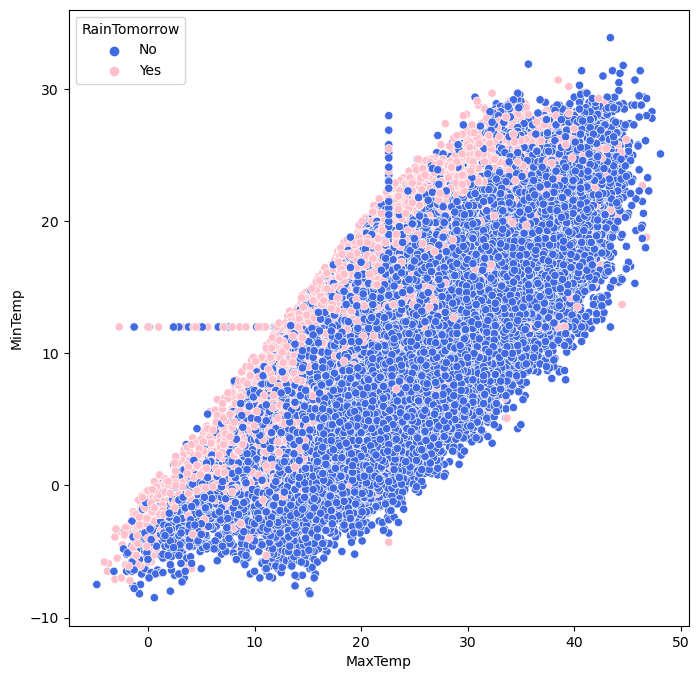

In [18]:
plt.figure(figsize=(8,8))
cols = ['royalblue','pink']
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = cols, data = df)

**Kesimpulan:**
- Pada grafik di atas, titik pink menunjukkan bahwa besok akan turun hujan dan titik biru menunjukkan bahwa tidak akan turun hujan. 
- Dapat dilihat pada visualisasi tersebut,  bahwa terdapat hubungan yang kuat antara MinTemp dan MaxTemp dengan RainTomorrow. Sehingga, ada peluang hujan yang lebih besar tergantung dengan MinTemp dan MaxTemp nya.

### 3. Bagaimana rata-rata distribusi curah hujan pada setiap bulan?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 1000x800 with 0 Axes>

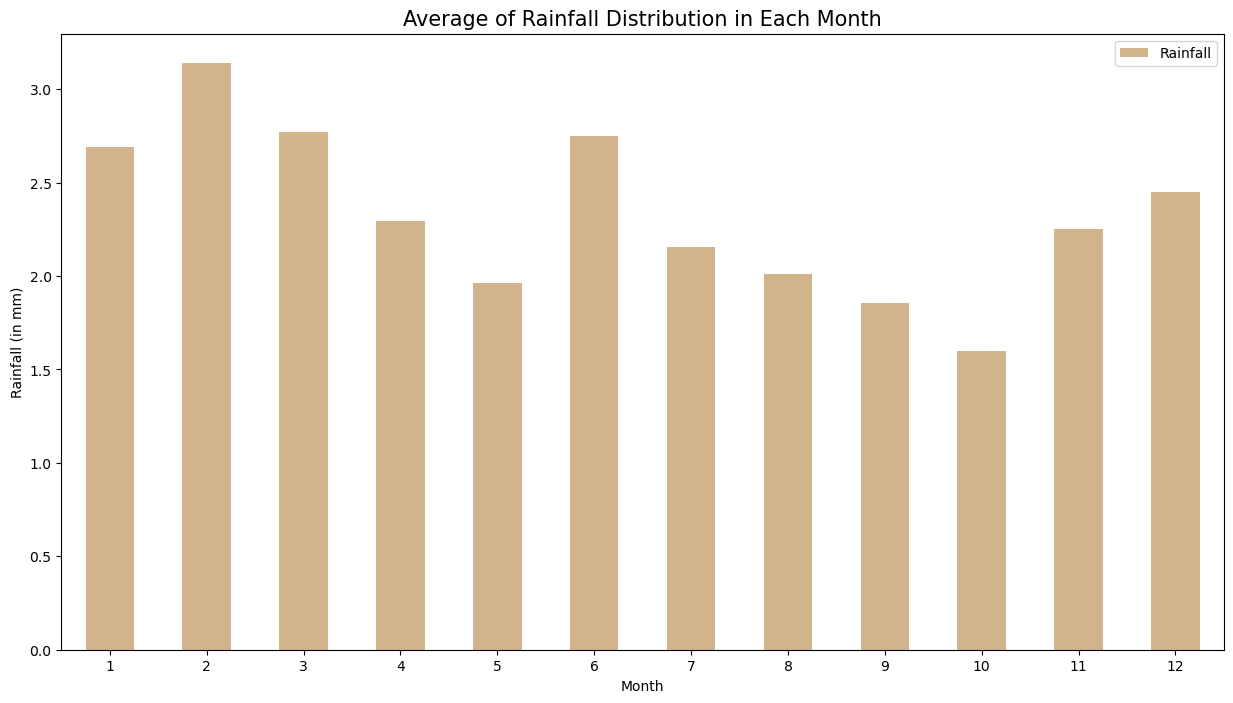

In [212]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
rainfall =[df['Date'].dt.year, df['Date'].dt.month, df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
df_rain = rainfall_df.groupby('Month').agg({'Rainfall':'mean'})
df_rain.plot(kind='bar', color='tan')
plt.title('Average of Rainfall Distribution in Each Month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

In [209]:
df_rain.sort_values(by='Rainfall', ascending=False)

,Rainfall
Month,
2,3.139696
3,2.768855
6,2.751707
1,2.692942
12,2.451970
4,2.295109
11,2.252133
7,2.157297
8,2.009939


**Kesimpulan:** <br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- Rata-rata curah hujan tertinggi ada pada bulan 2 (Februari) dengan nilai 3.14 mm
- Rata-rata curah hujan terendah ada pada bulan 10 (Oktober) dengan nilai 1.60 mm

### 4. Perbandingan antara jumlah WindGustDir, WindDir9am dan WindDir3pm

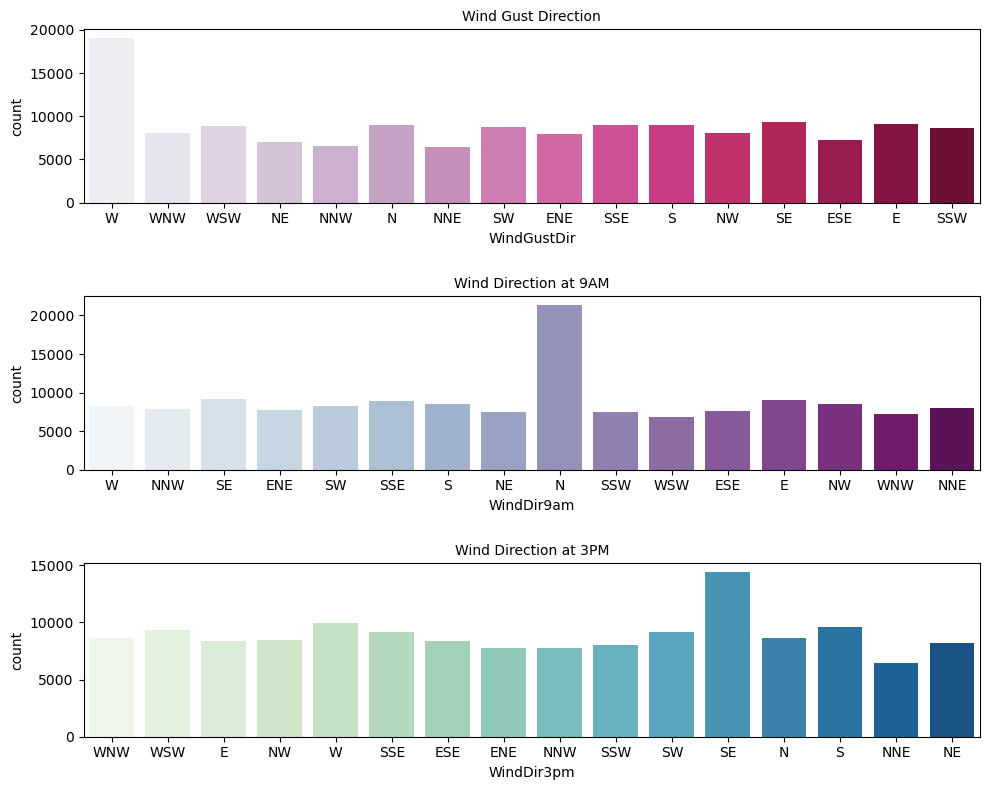

In [186]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))

# WindGustDir
sns.countplot(df['WindGustDir'], palette='PuRd', ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=10)

# WindDir9am
sns.countplot(df['WindDir9am'], palette='BuPu', ax=ax[1])
ax[1].set_title("\nWind Direction at 9AM", fontsize=10)

# WindDir3pm
sns.countplot(df['WindDir3pm'], palette='GnBu', ax=ax[2])
ax[2].set_title("\nWind Direction at 3PM", fontsize=10)
fig.tight_layout()

In [199]:
df['WindGustDir'].value_counts().head(3)

W     19110
SE     9309
E      9071
Name: WindGustDir, dtype: int64

In [200]:
df['WindDir9am'].value_counts().head(3)

N     21406
SE     9162
E      9024
Name: WindDir9am, dtype: int64

In [201]:
df['WindDir3pm'].value_counts().head(3)

SE    14441
W      9911
S      9598
Name: WindDir3pm, dtype: int64

**Kesimpulan:**

Berdasarkan visualisasi diatas, diperoleh bahwa:
- Pada bagian WindGustDir, arah hembusan angin terkuat dalam 24 jam hingga tengah malam paling banyak yaitu ke arah W (West) dengan jumlah data 19.110
- Pada bagian WinDir9am, arah angin pada jam 9 pagi paling banyak yaitu ke arah N (North) dengan jumlah data 21.406
- Pada bagian WinDir3pm, arah angin pada jam 3 malam paling banyak yaitu ke arah SE (South-east) dengan jumlah data 14.441

### 5. Bagaimana perbandingan rata-rata antara WindSpeed9am dan WindSpeed3pm berdasarkan lokasi?

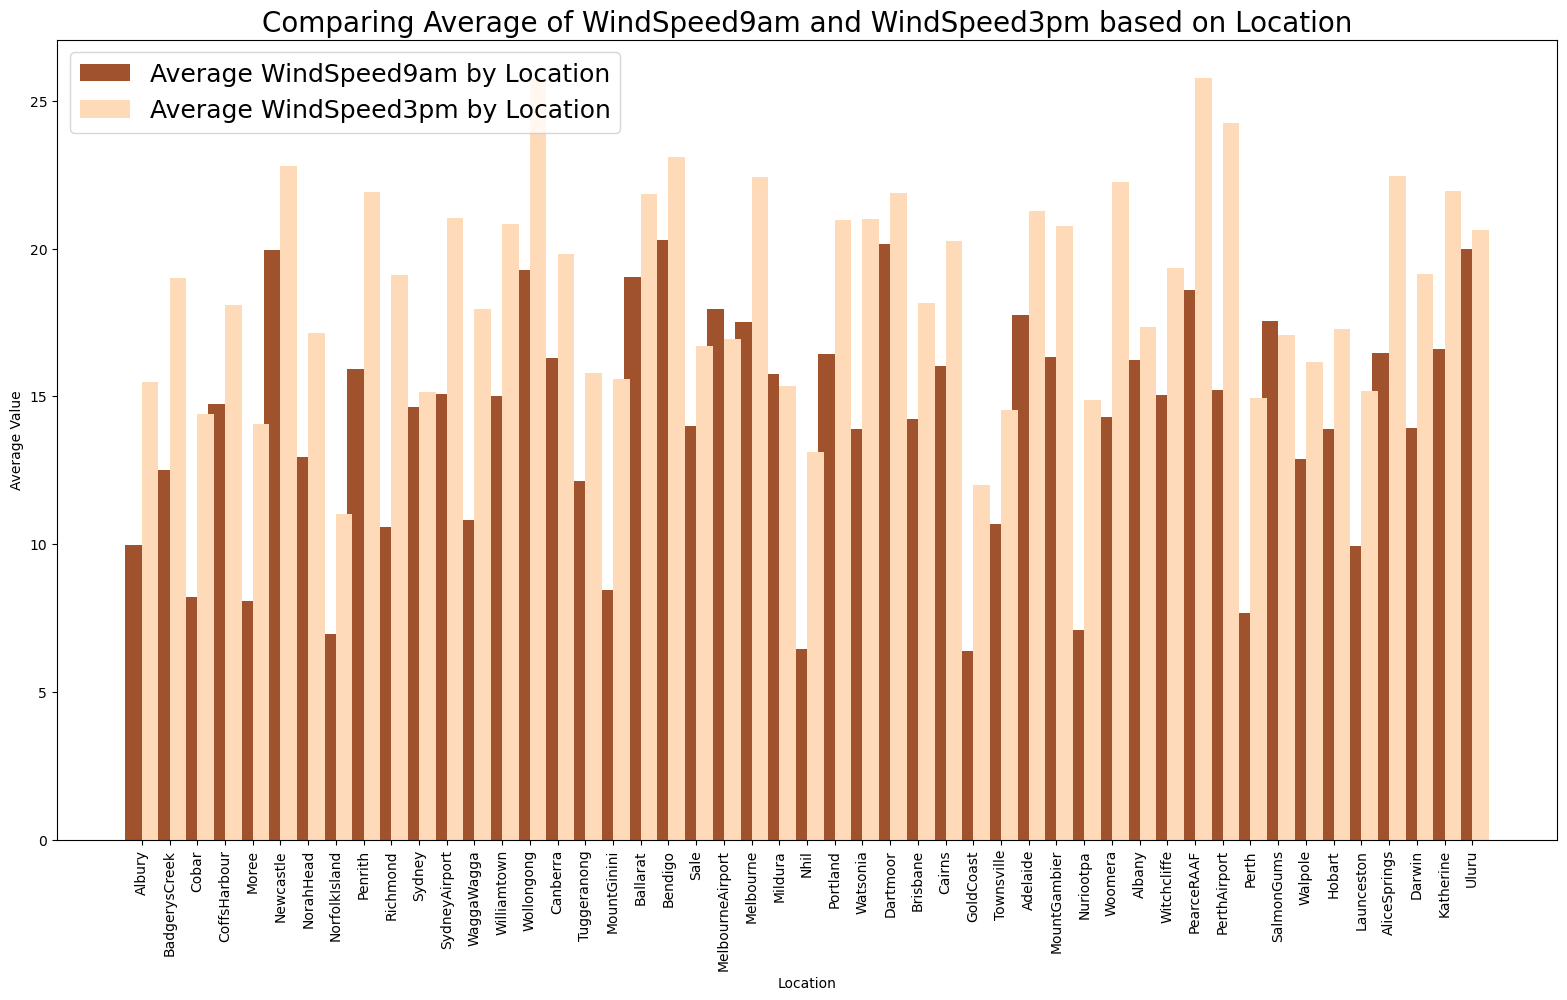

In [222]:
ws9am = df.groupby('Location').agg({'WindSpeed9am':'mean'})
ws3pm = df.groupby('Location').agg({'WindSpeed3pm':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, ws9am[:]['WindSpeed9am'], label='Average WindSpeed9am by Location', color='sienna', width=w)
ax.bar(x+w/2, ws3pm[:]['WindSpeed3pm'], label='Average WindSpeed3pm by Location', color='peachpuff', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.xlabel("Location")
plt.ylabel("Average Value")
plt.title("Comparing Average of WindSpeed9am and WindSpeed3pm based on Location", fontsize=20)
plt.legend(fontsize=18)

In [235]:
top3_ws9am = ws9am.sort_values(by='WindSpeed9am', ascending=False)
top3_ws9am.head()

,WindSpeed9am
Location,
MelbourneAirport,20.276504
NorfolkIsland,20.149123
Woomera,19.982609
Ballarat,19.960040
GoldCoast,19.267450


In [237]:
top3_ws3pm = ws3pm.sort_values(by='WindSpeed3pm', ascending=False)
top3_ws3pm.head()

,WindSpeed3pm
Location,
SydneyAirport,25.776040
GoldCoast,25.763758
Townsville,24.234092
MelbourneAirport,23.081422
Ballarat,22.776750


**Kesimpulan:**
 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:

### 6. Bagaimana distribusi data dari Humidity9am, Humidity3pm, Pressure9am, dan Pressure3pm?

Text(0.5, 1.0, 'Pressure at 3PM')

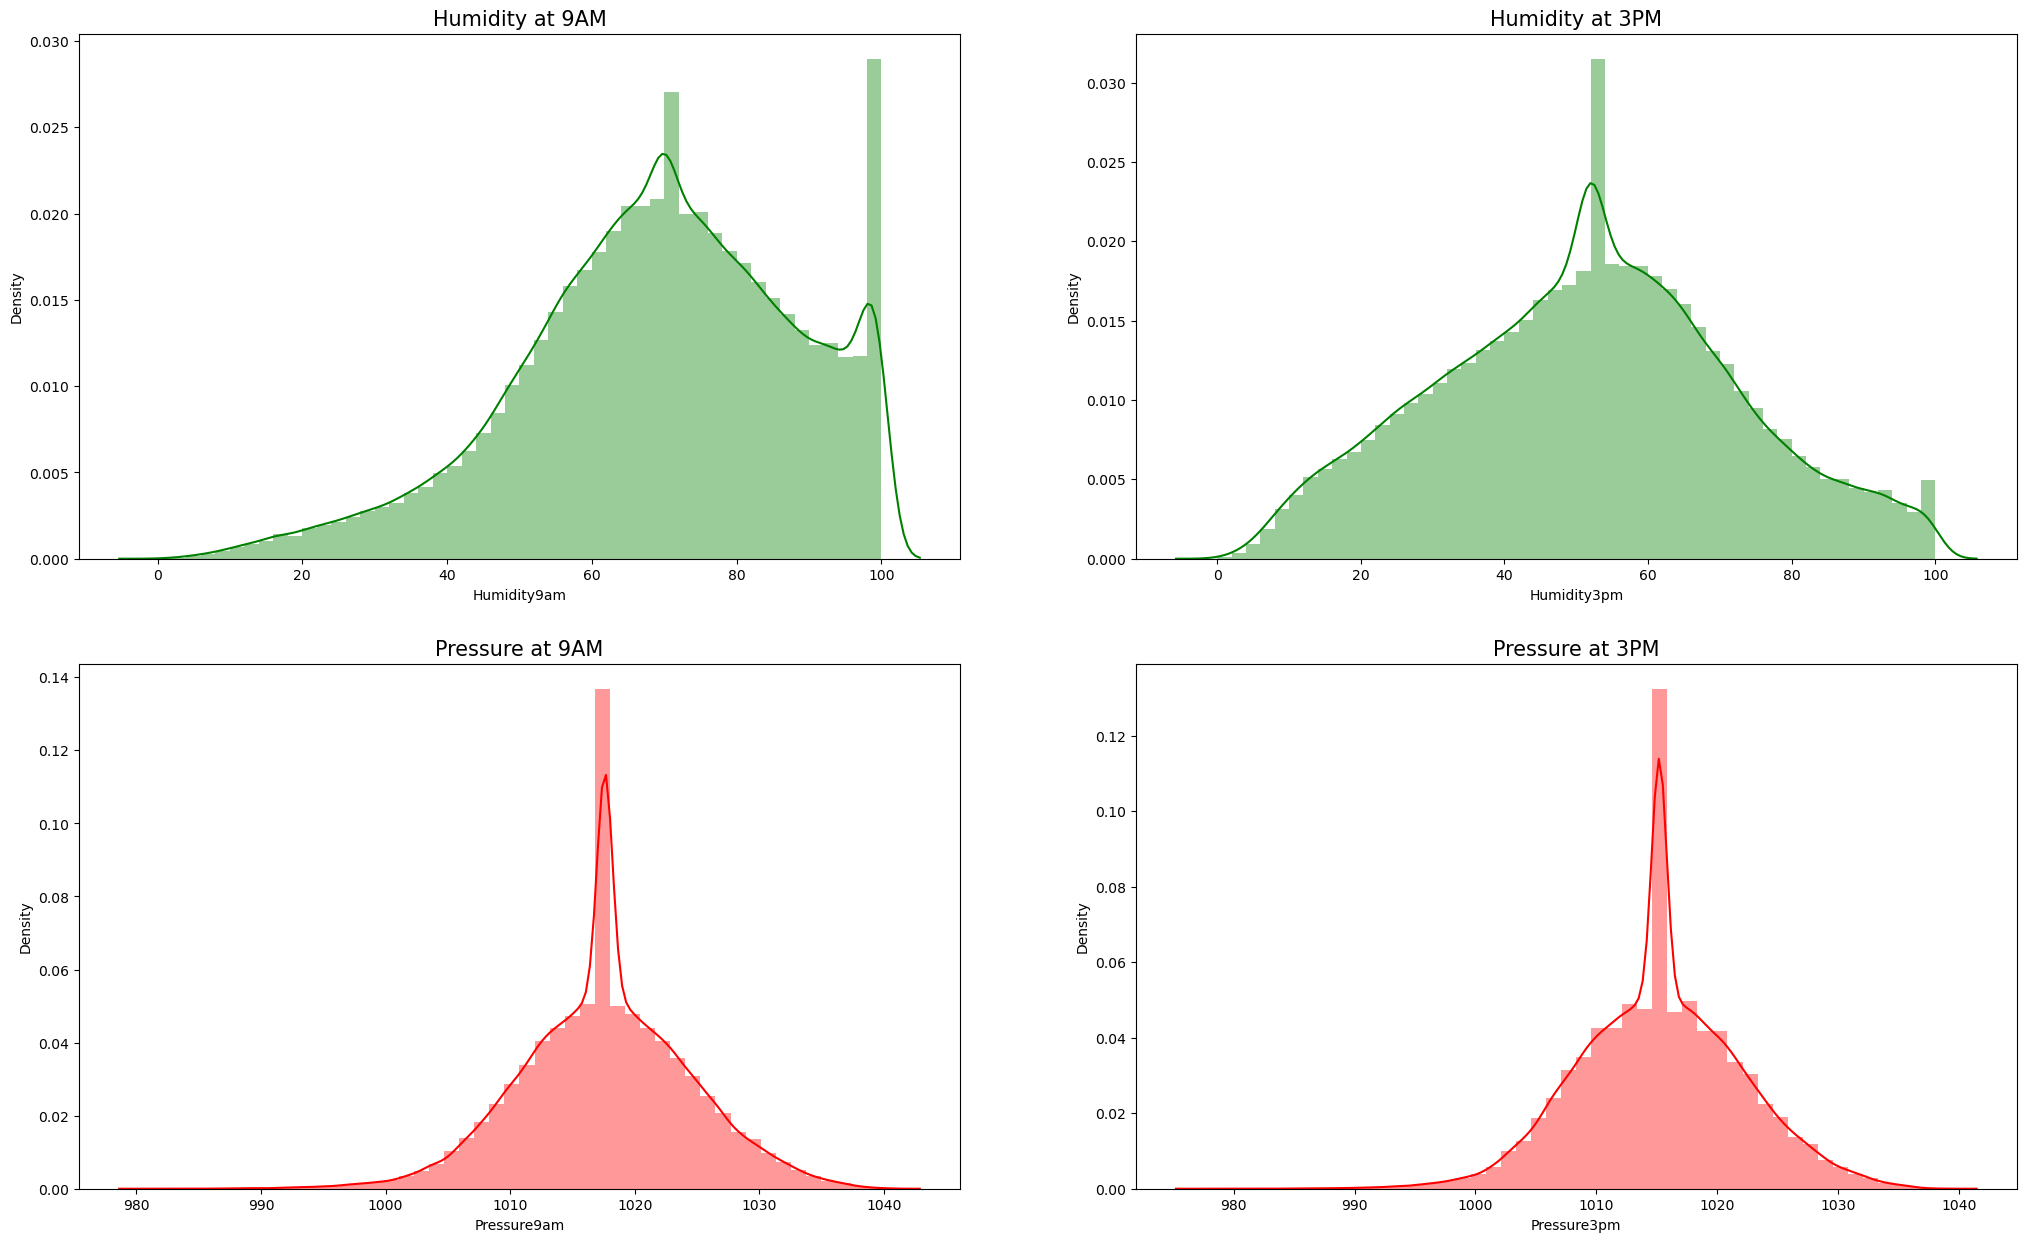

In [214]:
fig, ax = plt.subplots(2,2, figsize=(25,15))

# Humidity9am
sns.distplot(df['Humidity9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df['Humidity3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df['Pressure9am'], ax=ax[1,0], color='red')
ax[1,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df['Pressure3pm'], ax=ax[1,1], color='red')
ax[1,1].set_title("Pressure at 3PM", fontsize=15)

**Kesimpulan:**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:

### 7. Bagaimana perbandingan jumlah curah hujan dengan RainToday?

In [215]:
raintoday = pd.DataFrame({"Jumlah curah hujan":df["RainToday"].value_counts()})
raintoday

,Jumlah curah hujan
No,110738
Yes,31455


In [240]:
jumlah_data = raintoday["Jumlah curah hujan"]

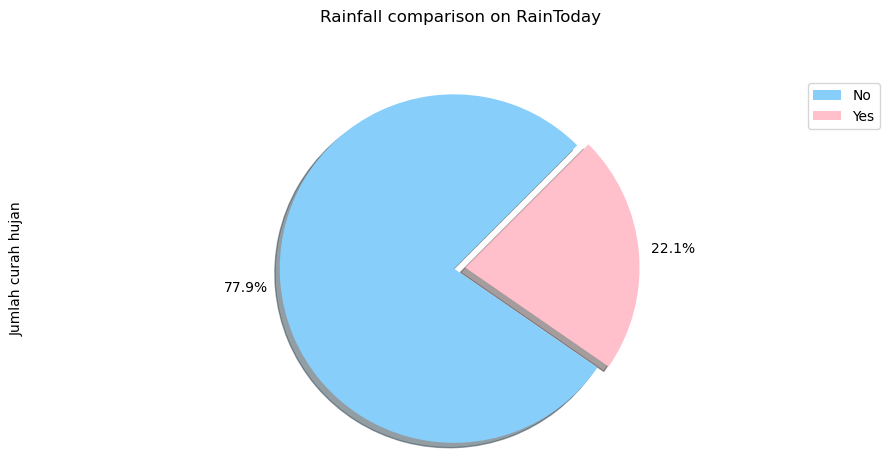

In [241]:
#pilih warna
colors_list = ['lightskyblue','pink']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05]

#Tambahkan details
jumlah_data.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=jumlah_data.index, loc='upper right')
plt.axis('equal')

#menambahkan judul
plt.title('Rainfall comparison on RainToday',y=1.12)

#menampilkan
plt.show()

**Kesimpulan:**

1. 

## E.3. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

In [26]:
#Mengambil beberapa kolom sample dari df untuk uji korelasi
df_cor = df.loc[:,['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]
df_cor.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### E.3.1.1. Melakukan proses label encoding

In [27]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

#### E.3.1.2. Membuat Visualisasi Heatmap berdasarkan df_cor1

In [28]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

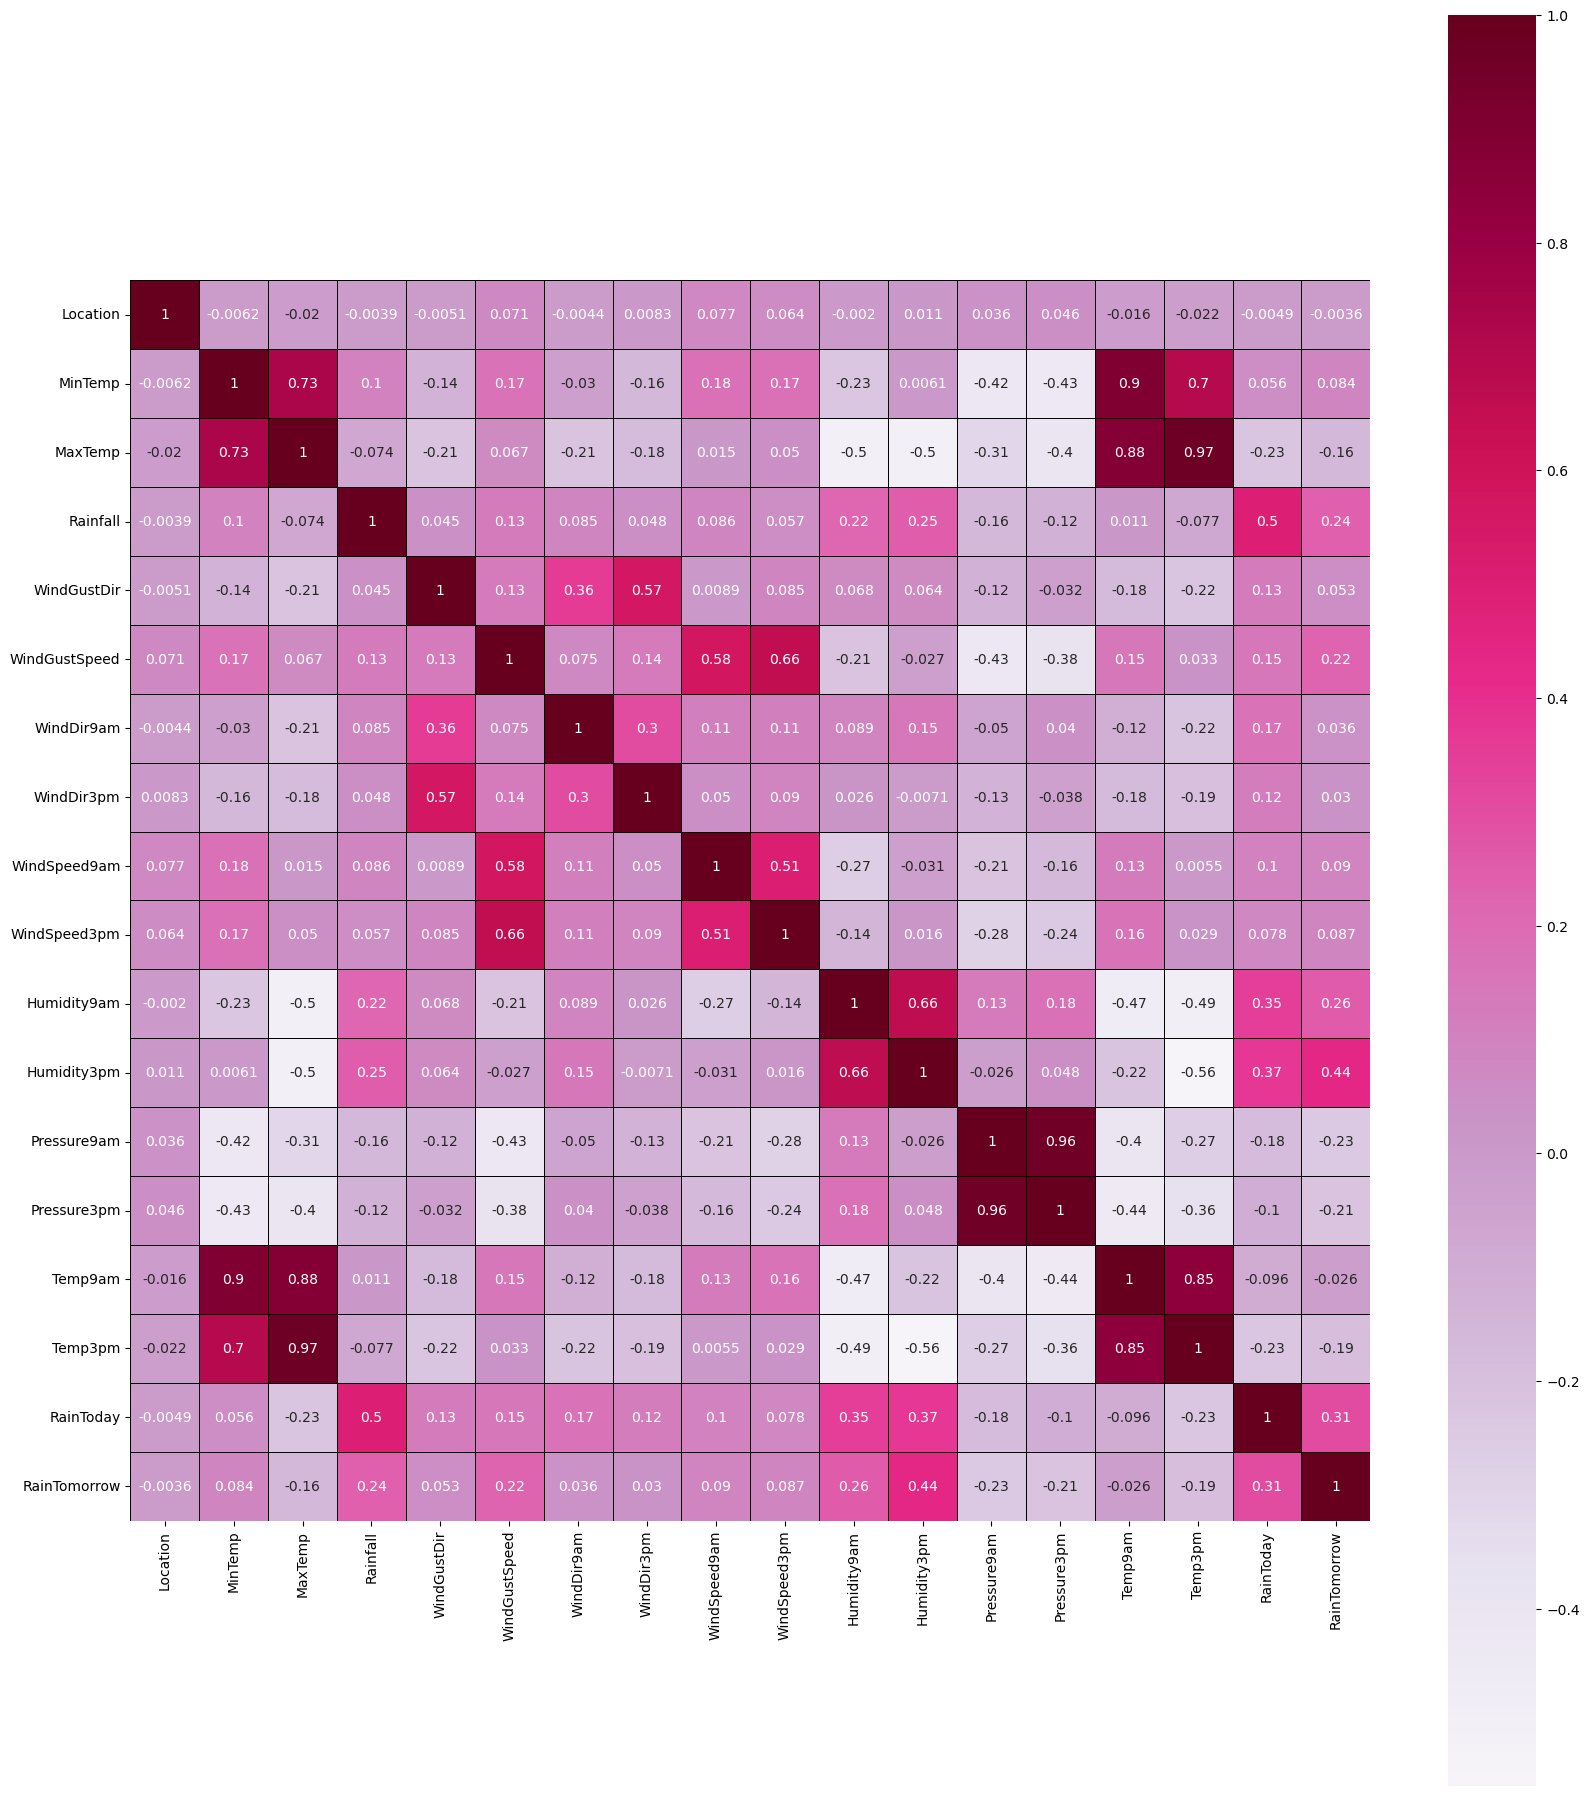

In [29]:
heat_map_modeling = ['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
heat_map(df_encode_cor,heat_map_modeling)

**Keterangan:**

Berdasarkan heatmap1, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `Humidity3pm`, dengan korelasi sebesar 0.44
2. `RainToday`, dengan korelasi sebesar 0.31
3. `WindGustDir`, dengan korelasi sebesar 0.053
4. `Rainfall`, dengan korelasi sebesar 0.24
5. `WindGustSpeed`, dengan korelasi sebesar 0.23
6. `Location`, dengan korelasi sebesar -0.0036
7. `MinTemp`, dengan korelasi sebesar 0.084
8. `Pressure9am`, dengan korelasi sebesar -0.23
7. `RainTomorrow`, dengan korelasi sebesar 1

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [30]:
df_central = df.loc[:,['MinTemp','Rainfall','WindGustSpeed','Humidity3pm','Pressure9am']]
df_central.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Pressure9am
0,13.4,0.6,44.0,22.0,1007.7
1,7.4,0.0,44.0,25.0,1010.6
2,12.9,0.0,46.0,30.0,1007.6
3,9.2,0.0,24.0,16.0,1017.6
4,17.5,1.0,41.0,33.0,1010.8


In [31]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: MinTemp
Mean: 12.186
Median: 12.000
Modus: 12.000
Range: 42.400
Variansi: 40.819
Standard Deviasi: 6.389
  
Nama Kolom: Rainfall
Mean: 2.327
Median: 0.000
Modus: 0.000
Range: 371.000
Variansi: 71.005
Standard Deviasi: 8.426
  
Nama Kolom: WindGustSpeed
Mean: 39.920
Median: 39.000
Modus: 39.000
Range: 129.000
Variansi: 172.676
Standard Deviasi: 13.141
  
Nama Kolom: Humidity3pm
Mean: 51.496
Median: 52.000
Modus: 52.000
Range: 100.000
Variansi: 421.572
Standard Deviasi: 20.532
  
Nama Kolom: Pressure9am
Mean: 1017.648
Median: 1017.600
Modus: 1017.600
Range: 60.500
Variansi: 45.512
Standard Deviasi: 6.746
  


# G. Cardinality
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [32]:
df_card = df.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]
df_card.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,13.4,0.6,W,44.0,22.0,1007.7,No,No
1,Albury,7.4,0.0,WNW,44.0,25.0,1010.6,No,No
2,Albury,12.9,0.0,WSW,46.0,30.0,1007.6,No,No
3,Albury,9.2,0.0,NE,24.0,16.0,1017.6,No,No
4,Albury,17.5,1.0,W,41.0,33.0,1010.8,No,No


In [33]:
print('Number of categories in the variable Location        : {}'.format(len(df_card.Location.unique())))
print('Number of categories in the variable MinTemp         : {}'.format(len(df_card.MinTemp.unique())))
print('Number of categories in the variable Rainfall        : {}'.format(len(df_card.WindGustDir.unique())))
print('Number of categories in the variable WindGustSpeed   : {}'.format(len(df_card.WindGustSpeed.unique())))
print('Number of categories in the variable Humidity3pm     : {}'.format(len(df_card.Humidity3pm.unique())))
print('Number of categories in the variable Pressure9am     : {}'.format(len(df_card.Pressure9am.unique())))
print('Number of categories in the variable RainToday       : {}'.format(len(df_card.RainToday.unique())))
print('Number of categories in the variable RainTomorrow    : {}'.format(len(df_card.RainTomorrow.unique())))

Number of categories in the variable Location        : 49
Number of categories in the variable MinTemp         : 389
Number of categories in the variable Rainfall        : 16
Number of categories in the variable WindGustSpeed   : 67
Number of categories in the variable Humidity3pm     : 101
Number of categories in the variable Pressure9am     : 546
Number of categories in the variable RainToday       : 2
Number of categories in the variable RainTomorrow    : 2


**Keterangan:**

Dapat dilihat bahwa number of categories (unique value) dari MinTemp dan Pressure9am sangat banyak atau biasa disebut dengan istilah high cardinality. Namun, dikarenakan MinTemp merupakan temperature minimal dan Pressure9am merupakah nilai tekanan maka tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality. Karena kita tidak bisa mereduced temperature dan tekanan yang tentunya dapat berbeda setiap harinya.

# Undersampling

In [62]:
#create two different dataframe of majority and minority class 
df_majority = df_encode_cor[(df_encode_cor['RainTomorrow']==0)] 
df_minority = df_encode_cor[(df_encode_cor['RainTomorrow']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 31877, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

In [63]:
df_undersampling['RainTomorrow'].value_counts()

0    31877
1    31877
Name: RainTomorrow, dtype: int64

Bisa dilihat bahwa datanya sudah menyesuaikan nilai minoritas atau dalam hal ini sebanyak 31877. Next kita lanjut Feature scaling.

# H. Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Dua teknik paling umum untuk feature scaling adalah: Normalization dan Standardization. Pada project ini, kami menggunakan Standardization. Standardization mengubah data sehingga memiliki rata-rata 0 dan variance 1, membuat datanya tidak memiliki unit awal.


In [64]:
#Membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()

#Copy data frame df_new dan simpan pada scale_df
df_new = df_undersampling.copy()
df_model = df_new.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]

#Setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada numeric_df
df_model[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am']] = scaler.fit_transform(df_model[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am']])

In [66]:
df_model.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
20515,0.162845,0.808200,-0.331119,-0.916880,0.712981,1.139926,0.701252,0,0
1119,-1.532843,0.587943,-0.331119,-1.132268,-1.124951,-1.273349,0.115869,0,0
137404,-1.462190,-1.378640,-0.331119,-1.778434,-0.771503,-2.015896,0.872583,0,0
145411,1.222649,-0.481878,-0.331119,-1.778434,-0.205985,-1.691032,1.286635,0,0
102628,0.304152,-0.230156,-0.331119,-1.347657,-0.842192,-0.994894,0.615586,0,0


# J. Analisis
Pada tahap ini berisi beberapa kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

## J.1. Kondisi 1
Kondisi 1 adalah dengan melakukan label encoder.

In [68]:
df_kondisi1 = df_model.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]
df_kondisi1.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
20515,0.162845,0.808200,-0.331119,-0.916880,0.712981,1.139926,0.701252,0,0
1119,-1.532843,0.587943,-0.331119,-1.132268,-1.124951,-1.273349,0.115869,0,0
137404,-1.462190,-1.378640,-0.331119,-1.778434,-0.771503,-2.015896,0.872583,0,0
145411,1.222649,-0.481878,-0.331119,-1.778434,-0.205985,-1.691032,1.286635,0,0
102628,0.304152,-0.230156,-0.331119,-1.347657,-0.842192,-0.994894,0.615586,0,0


In [69]:
df_kondisi1['RainTomorrow'].value_counts()

0    31877
1    31877
Name: RainTomorrow, dtype: int64

### I.1.1. Mengidentifikasi data apakah berdistribusi normal atau skewness

In [70]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi1, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi1[variable])
    plt.title('Boxplot')

    plt.show()

In [71]:
select = df_kondisi1[['RainTomorrow']]
select.head()

,RainTomorrow
20515,0
1119,0
137404,0
145411,0
102628,0


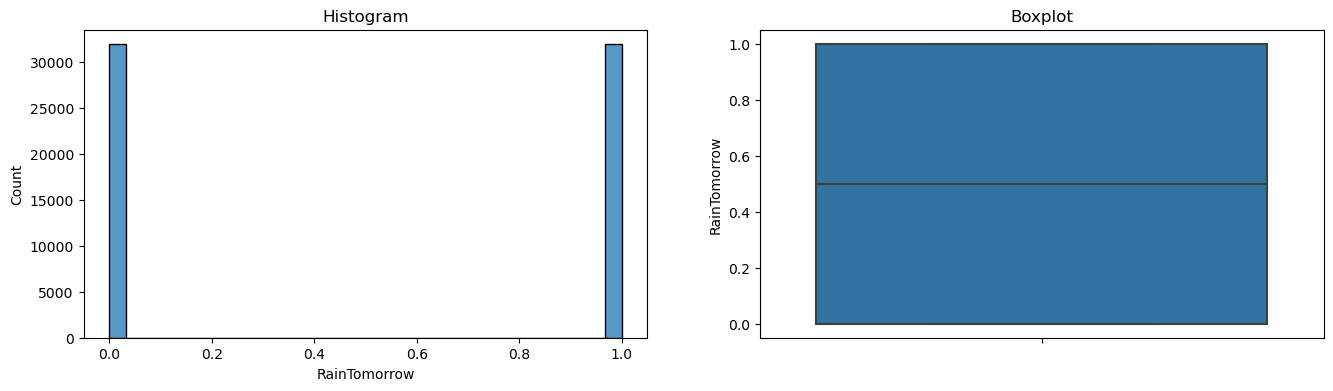

Skewness Value :  0.0


In [72]:
diagnostic_plots(select, 'RainTomorrow')
print('Skewness Value : ', select['RainTomorrow'].skew())

Ternyata data tersebut tidak memiliki Skewness Value, selanjutnya mari kita selesaikan outliersnya.

### I.1.2. Outliers

In [73]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['RainTomorrow']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [74]:
outliers(df_kondisi1[continous_features])

Pada kolom RainTomorrow, jumlah outliernya adalah 0


### I.1.3. Menghitung nilai kuartil

In [75]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel Q1
Q1 = df_kondisi1['RainTomorrow'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel Q3
Q3 = df_kondisi1['RainTomorrow'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.0
Nilai Kuartil 3 :  1.0
Nilai Rentang :  1.0


<AxesSubplot:xlabel='RainTomorrow'>

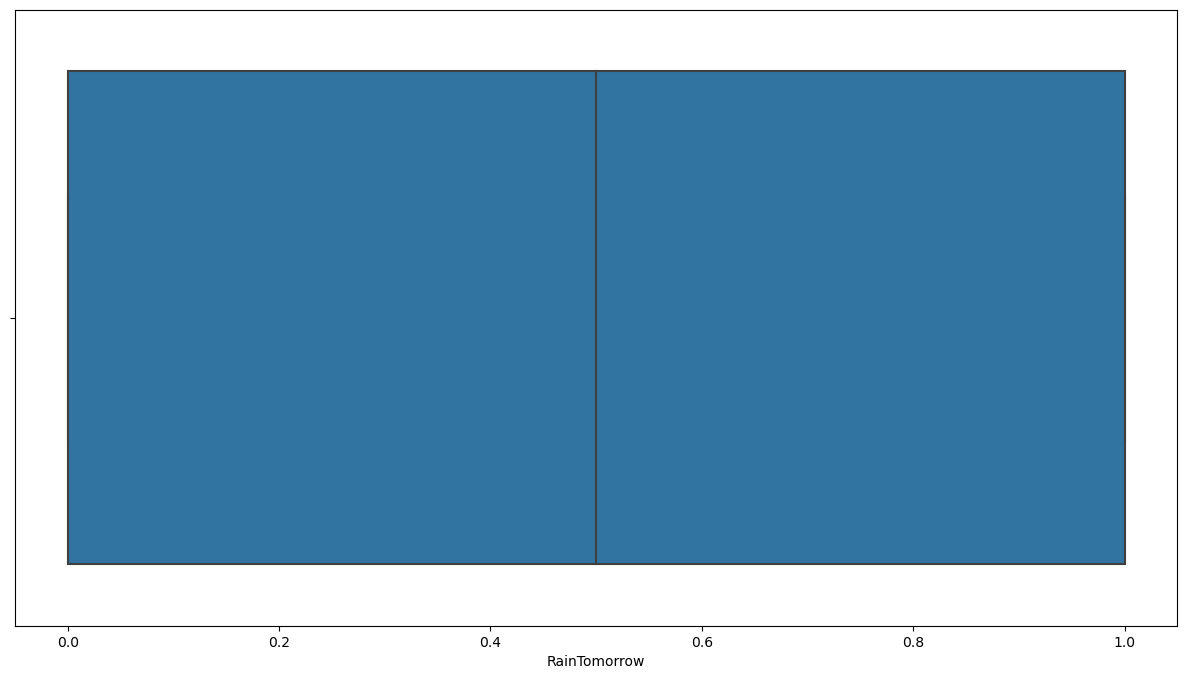

In [76]:
sns.boxplot(df_kondisi1["RainTomorrow"])

#### I.1.3.1. Melakukan filtering pada df_kondisi1 berdasarkan kondisi yang diberikan 
- Kondisi1 adalah nilai kolom 'price' harus lebih besar dari (Q3+(1.5 * IQR)) <br>
- Angka 1.5 dalam rumus (Q3+(1.5 * IQR)) atau (Q1-(1.5 * IQR)) adalah nilai yang digunakan dalam metode IQR (Interquartile Range) untuk mengidentifikasi outlier.

In [77]:
df_kondisi1[df_kondisi1['RainTomorrow'] > (Q3 + (1.5 * IQR))].head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow


#### I.1.3.2. Melakukan filtering pada df_kondisi1 berdasarkan kondisi yang diberikan
Kondisi1 adalah nilai kolom 'price' harus kurang dari (Q1 - (1.5 * IQR))

In [78]:
df_kondisi1[df_kondisi1['RainTomorrow'] < (Q1 - (1.5 * IQR))]

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow


In [79]:
print('Data sebelum di hilangkan outliernya :', df_kondisi1.shape)
df_kondisi1= df_kondisi1[~((df_kondisi1['RainTomorrow']>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_kondisi1.shape)

Data sebelum di hilangkan outliernya : (63754, 9)
Data sesudah dihilangkan outliernya : (63754, 9)


<AxesSubplot:xlabel='RainTomorrow'>

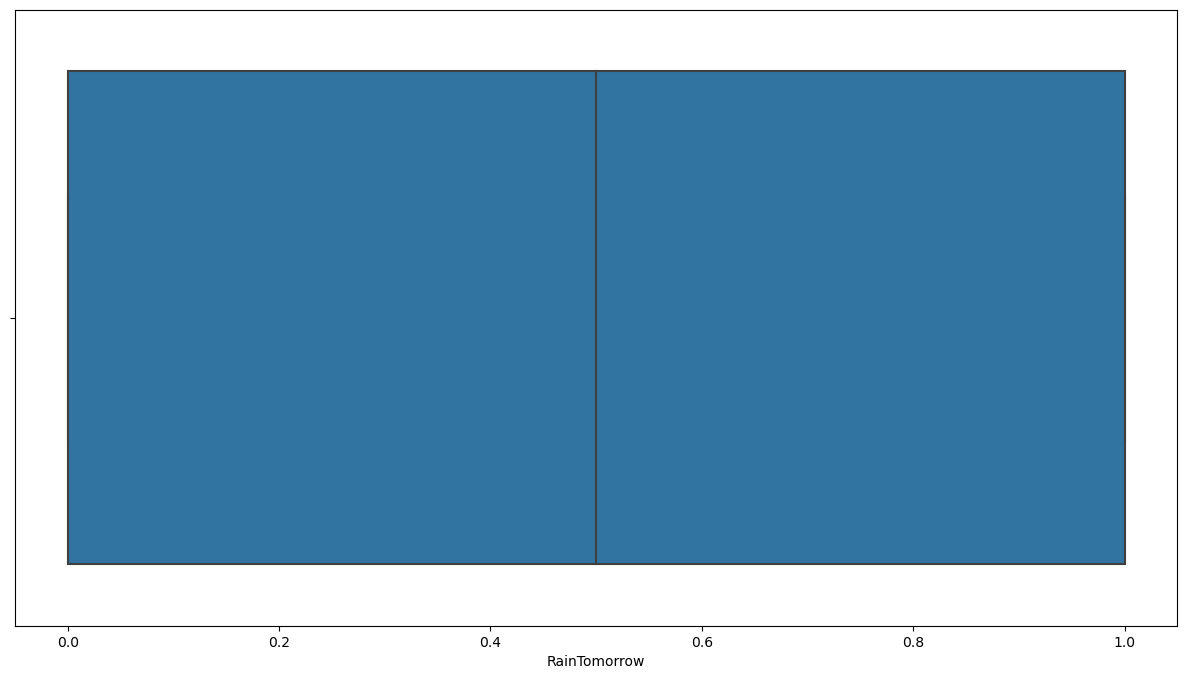

In [80]:
sns.boxplot(df_kondisi1["RainTomorrow"])

In [81]:
df_kondisi1.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
20515,0.162845,0.808200,-0.331119,-0.916880,0.712981,1.139926,0.701252,0,0
1119,-1.532843,0.587943,-0.331119,-1.132268,-1.124951,-1.273349,0.115869,0,0
137404,-1.462190,-1.378640,-0.331119,-1.778434,-0.771503,-2.015896,0.872583,0,0
145411,1.222649,-0.481878,-0.331119,-1.778434,-0.205985,-1.691032,1.286635,0,0
102628,0.304152,-0.230156,-0.331119,-1.347657,-0.842192,-0.994894,0.615586,0,0


# J. Pendefinisian Model
Mendefinisikan model linear regression.

In [100]:
lr = LogisticRegression()
svc = SVC()

# K. Pelatihan Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

## K.1. Kondisi 1

In [98]:
x = df_kondisi1.drop(columns=['RainTomorrow'],axis=1).values
y = df_kondisi1['RainTomorrow'].values

# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)

In [101]:
lr_kondisi1 = lr.fit(x_train1, y_train1)
y_pred1 = lr_kondisi1.predict(x_test1)

In [102]:
#Melihat pembagian data pada training set dan test set
print("{0:0.2f}% ada pada training set". format((len(x_train1)/len(df_kondisi1.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test1)/len(df_kondisi1.index)) * 100))

70.00% ada pada training set
30.00% ada pada test set


In [103]:
#model training
lr_model1 = LogisticRegression()
lr_model1.fit(x_train1, y_train1.ravel())

LogisticRegression()

# L. Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. 

## L.1. Kondisi 1

### L.1.1. Mencari nilai R-squared, MSE, dan RMSE
- R squared, merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen atau bisa disebut juga dengan akurasi (%).
- Mean Squared Error (MSE), adalah Rata-rata Kesalahan kuadrat antara nilai aktual dan nilai peramalan. 
- Root Mean Square Error (RMSE), adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. 

In [113]:
#Mengevaluasi model data train
lr_predict_train = lr_model1.predict(x_train1)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train1, lr_predict_train)))

Accuracy: 0.7601


In [114]:
#Mengevaluasi model data test
lr_predict_test = lr_model1.predict(x_test1)

print("lr_predict_test", lr_predict_test)
print("y_test", y_test1)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test1, lr_predict_test)))

lr_predict_test [0 1 0 ... 1 0 1]
y_test [0 1 0 ... 1 1 1]
Accuracy: 0.7623


In [115]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test1, lr_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test1, lr_predict_test))

Confusion Matrix
[[7358 2169]
 [2378 7222]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      9527
           1       0.77      0.75      0.76      9600

    accuracy                           0.76     19127
   macro avg       0.76      0.76      0.76     19127
weighted avg       0.76      0.76      0.76     19127



### L.1.3. Melihat hasil prediksi dan perbandingan dengan data aktual

In [116]:
y_pred1

array([0, 1, 0, ..., 1, 0, 1])

In [117]:
kondisi1 = pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
kondisi1.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


### L.1.4. Membuat visualisasi logistic regression

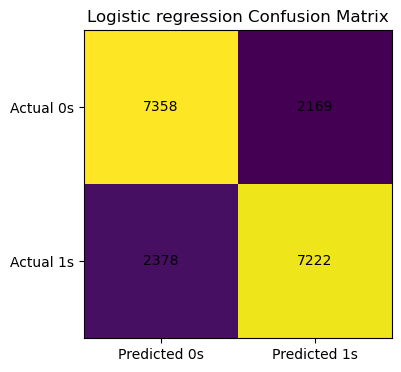

In [120]:
#Logistic regression
confMLR = confusion_matrix(y_test1, lr_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Logistic regression Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='black')
plt.show()

___